# <p style="background:#40180D;color:#ffffff; text-align:center;font-size:30px;padding:15px;font-family:Sans-serif"> Recommender System - Anime Shows Ratings Analysis</p>

Finding recommended animes user to user if they have cosine similarity between the ratings they have given to the animes

### <p style="padding:10px;background-color:orange;margin:0;color:black;font-family:Sans-Serif;font-size:20px;font-weight:500">Import required libraries</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### <p style="padding:10px;background-color:orange;margin:0;color:black;font-family:Sans-Serif;font-size:20px;font-weight:500">Load Dataset</p>

In [2]:
df = pd.read_csv('anime.csv')
df

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


### <p style="padding:10px;background-color:orange;margin:0;color:black;font-family:Sans-Serif;font-size:20px;font-weight:500">Basic EDA</p>

In [3]:
df.shape

(12294, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [5]:
df['name'].value_counts()

name
Shi Wan Ge Leng Xiaohua                           2
Saru Kani Gassen                                  2
Bakabon Osomatsu no Karee wo Tazunete Sansenri    1
Backkom Meogeujan Yeohaeng                        1
Backkom Mission Impossible                        1
                                                 ..
Yoroiden Samurai Troopers Kikoutei Densetsu       1
Yuu☆Yuu☆Hakusho: Mu Mu Hakusho                    1
3-gatsu no Lion meets Bump of Chicken             1
Bannou Bunka Neko-Musume                          1
Yasuji no Pornorama: Yacchimae!!                  1
Name: count, Length: 12292, dtype: int64

In [6]:
df['genre'].value_counts()

genre
Hentai                                                  823
Comedy                                                  523
Music                                                   301
Kids                                                    199
Comedy, Slice of Life                                   179
                                                       ... 
Adventure, Drama, Fantasy, Game, Sci-Fi                   1
Adventure, Demons, Fantasy, Historical                    1
Action, Comedy, Drama, Mecha, Music, Sci-Fi, Shounen      1
Action, Comedy, Fantasy, Mecha, Sci-Fi, Shounen           1
Hentai, Slice of Life                                     1
Name: count, Length: 3264, dtype: int64

In [7]:
df['rating'].value_counts()

rating
6.00    141
7.00     99
6.50     90
6.25     84
5.00     76
       ... 
3.47      1
3.71      1
3.87      1
3.91      1
3.14      1
Name: count, Length: 598, dtype: int64

In [8]:
# Round up to 1 decimal place
df['rating'] = np.ceil(df['rating'] * 10) / 10
print(df['rating'].value_counts())

rating
6.8     566
6.5     523
6.4     521
6.6     513
6.7     503
       ... 
1.7       1
2.5       1
2.4       1
9.6       1
10.0      1
Name: count, Length: 77, dtype: int64


Here we have rating provided with 2 decimals int he dataset, when we taken the value count for the rating the lenght of the value counts numbers is around 598. So we converted the ratign to one decimals which reduced the lenght of the value counts of the ratings to 77 which is very helpful by rounding up the ratings to proper format. 

In [9]:
df

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.4,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.3,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.3,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.2,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.2,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.2,211
12290,5543,Under World,Hentai,OVA,1,4.3,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.9,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,5.0,175


In [10]:
df['members'].value_counts()

members
72       36
60       36
74       33
62       32
103      31
         ..
11941     1
5134      1
9447      1
2945      1
72174     1
Name: count, Length: 6706, dtype: int64

In [11]:
## Finding unique Anime ID
print(df.anime_id.unique())
len(df.anime_id.unique())

[32281  5114 28977 ...  5621  6133 26081]


12294

In [12]:
df.duplicated().sum()

0

**Key Insights :** 
* There is no existance of duplicate record>

In [13]:
## Finding unique members
print(df.members.unique())
len(df.members.unique())

[200630 793665 114262 ...  27411  57355    652]


6706

<span style="background-color:green;;f;padding:10px; margin:0;"> **Key Insights :** </span>
* We can find that there are 6706 unique members

### <p style="padding:10px;background-color:orange;margin:0;color:black;font-family:Sans-Serif;font-size:20px;font-weight:500">Dataset Summary</p>

In [14]:
df.describe()

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.516902,1.807134e+04
std,11455.294701,1.028073,5.482068e+04
min,1.000000,1.700000,5.000000e+00
25%,3484.250000,5.900000,2.250000e+02
50%,10260.500000,6.600000,1.550000e+03
75%,24794.500000,7.200000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


In [15]:
df.describe(include=object)

,name,genre,type,episodes
count,12294,12232,12269,12294
unique,12292,3264,6,187
top,Shi Wan Ge Leng Xiaohua,Hentai,TV,1
freq,2,823,3787,5677


In [16]:
## Checking if there is presence of null values 
df.isna().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [17]:
# droping null values 
df.dropna(axis=0, inplace=True)

In [18]:
df.isna().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

In [19]:
df.shape

(12017, 7)

### <p style="padding:10px;background-color:orange;margin:0;color:black;font-family:Sans-Serif;font-size:20px;font-weight:500">Visualization</p>

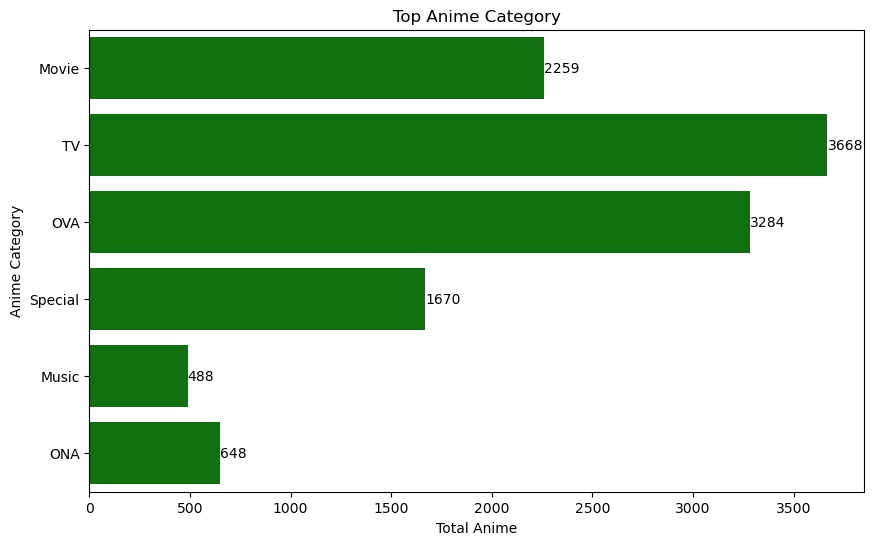

In [20]:
plt.figure(figsize=(10,6))
ax = sns.countplot(y = df['type'],color='green')
ax.bar_label(ax.containers[0])
plt.title("Top Anime Category")
plt.xlabel("Total Anime")
plt.ylabel("Anime Category")
plt.show()

**Key Insights :**
* Anime category TV streams almost 3787 anime shows which are the highest anime shows category which is 30.80% of total anime.
* OVA streams 3311 animes shows which are second highest anime show, which is 26.93% of total anime
* Anime category Movies streams 2348 animes, which is 19.09% of total anime
* Special anime category streams 1676 anime shows, which is 13.63% of total anime shows
* And Lastly ONA And Music categories streams around 659 shows which is 5.36% and 488 music shows which is 3.96% of total anime 


In [21]:
top_anime = df.sort_values(['members'], ascending=False)
top_anime

,anime_id,name,genre,type,episodes,rating,members
40,1535,Death Note,"Mystery, Police, Psychological, Supernatural, ...",TV,37,8.8,1013917
86,16498,Shingeki no Kyojin,"Action, Drama, Fantasy, Shounen, Super Power",TV,25,8.6,896229
804,11757,Sword Art Online,"Action, Adventure, Fantasy, Game, Romance",TV,25,7.9,893100
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.3,793665
159,6547,Angel Beats!,"Action, Comedy, Drama, School, Supernatural",TV,13,8.4,717796
...,...,...,...,...,...,...,...
10500,33822,Ten ni Yaka Reru: E ni Yoru Shougen,"Drama, Historical",OVA,1,7.0,20
9701,33826,Neko no Kuni no Kenpou,Historical,OVA,1,7.4,20
8367,34259,Chotto Ugoku!? &quot;Futeneko&quot;,Comedy,OVA,1,6.0,17
10464,33662,Taka no Tsume 8: Yoshida-kun no X-Files,"Comedy, Parody",Movie,1,10.0,13


In [22]:
top_anime['members'][:14]

40     1013917
86      896229
804     893100
1       793665
159     717796
19      715151
841     683297
3       673572
445     657190
131     633817
582     624055
760     623511
449     618056
118     602291
Name: members, dtype: int64

C:\Users\User\AppData\Local\Temp\ipykernel_12272\3410354455.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_anime, x=top_anime["name"][:13],y=top_anime["members"], palette='viridis')


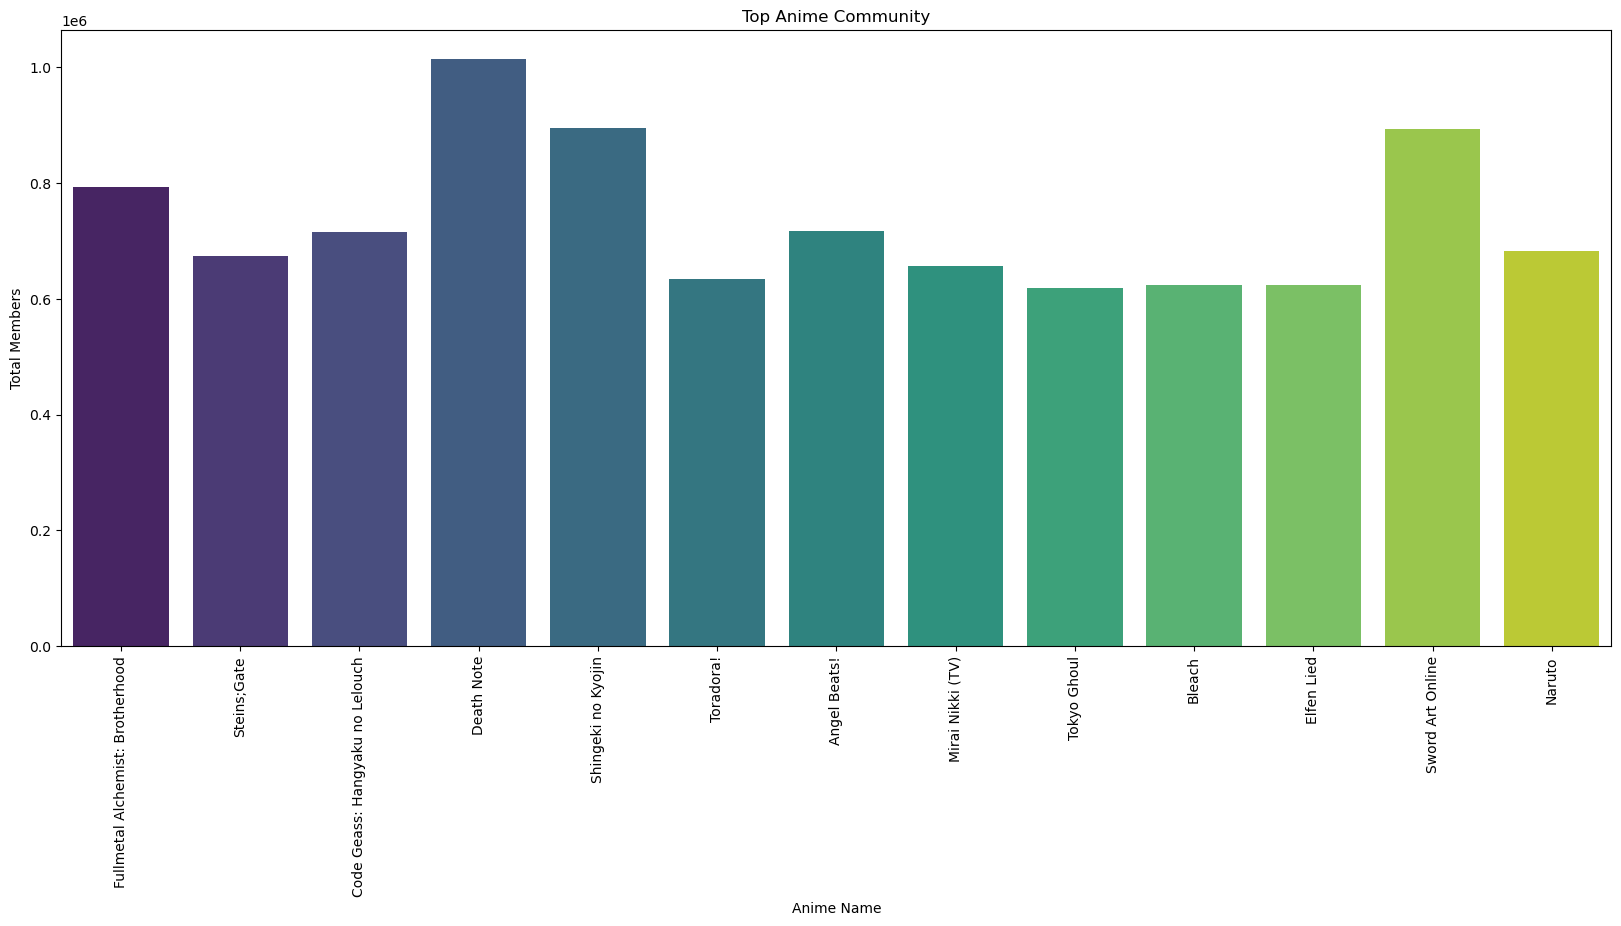

In [23]:
order = top_anime['members'][:14]
plt.figure(figsize=(20,8))
sns.barplot(data=top_anime, x=top_anime["name"][:13],y=top_anime["members"], palette='viridis')
plt.title("Top Anime Community")
plt.xlabel("Anime Name")
plt.ylabel("Total Members")
plt.xticks(rotation=90)
plt.show()

**Key Insights :**
  * **Death Note** is the highest watched and popular anime show by community members followed by **Shingeki no Kyojin** and **Sword Art On**

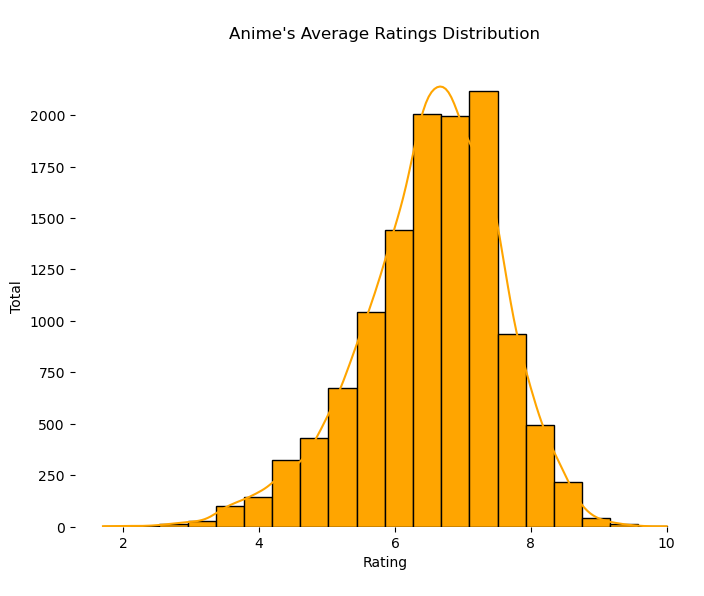

In [24]:
plt.figure(figsize=(8,6))
plt.tight_layout(pad=6.0)
top_anime_temp2 = df.sort_values(['rating'],ascending=False)
sns.histplot(top_anime_temp2["rating"],kde=True,bins=20,alpha=1,fill=True,color='orange')
plt.title("\nAnime's Average Ratings Distribution\n")
plt.xlabel("Rating\n")
plt.ylabel("Total")
sns.despine(left=True, bottom=True)
plt.show()

**Key Insights :**
* Most of the anime ratings lies between nearly 5.5 to 8.0
* The distribution of the data is left skewed

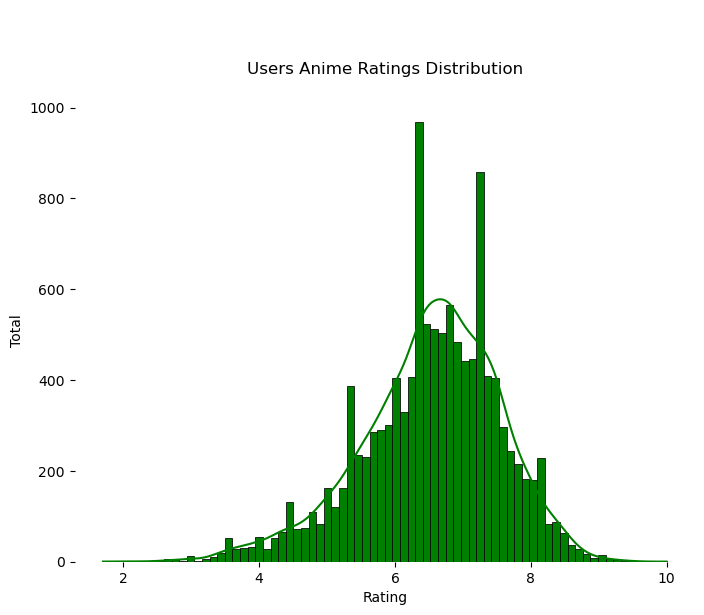

In [25]:
plt.figure(figsize=(8,6))
plt.tight_layout(pad=6.0)
sns.histplot(df["rating"],color='green',kde=True,bins="auto",alpha=1,fill=True)
plt.title("\n\n\nUsers Anime Ratings Distribution\n")
plt.xlabel("Rating")
plt.ylabel("Total")
sns.despine(left=True, bottom=True)
plt.show()

**Key Insights :**
* Most of the users ratings are spread between 6.0 - 8.0* The mode of the users ratings distribution is around 6.0 - 7.0
* Thehe distribution are left skewed

### <p style="padding:10px;background-color:orange;margin:0;color:black;font-family:Sans-Serif;font-size:20px;font-weight:500">Data Processing - Cosine Similarity</p>
<p style="font-size:16px;">We will create a sparse matrix to find a cosine similarity, we will convert the data using pivot table, selecting index as members, columns as anime names and values contains ratings</p>

In [70]:
df.sort_values('members')

,anime_id,name,genre,type,episodes,rating,members
10444,34490,Sushi Azarashi,Comedy,TV,30,3.000000,12
10464,33662,Taka no Tsume 8: Yoshida-kun no X-Files,"Comedy, Parody",Movie,1,10.000000,13
8367,34259,Chotto Ugoku!? &quot;Futeneko&quot;,Comedy,OVA,1,6.000000,17
9805,34363,Ocha-ken: Ryokutto Monogatari,"Kids, Slice of Life",TV,13,8.000000,20
10500,33822,Ten ni Yaka Reru: E ni Yoru Shougen,"Drama, Historical",OVA,1,7.000000,20
...,...,...,...,...,...,...,...
159,6547,Angel Beats!,"Action, Comedy, Drama, School, Supernatural",TV,13,8.400000,717796
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.300000,793665
804,11757,Sword Art Online,"Action, Adventure, Fantasy, Game, Romance",TV,25,7.900000,893100
86,16498,Shingeki no Kyojin,"Action, Drama, Fantasy, Shounen, Super Power",TV,25,8.600000,896229


In [78]:
df['rating'].unique()

array([ 9.4,  9.3,  9.2,  9.1,  9. ,  8.9,  8.8,  8.7,  8.6,  8.5,  8.4,
        8.3,  8.2,  8.1,  8. ,  7.9,  7.8,  7.7,  7.6,  7.5,  7.4,  7.3,
        7.2,  7.1,  7. ,  6.9,  6.8,  6.7,  6.6,  6.5,  6.4,  6.3,  6.2,
        6.1,  6. ,  5.9,  5.8,  5.7,  5.6,  5.5,  5.4,  5.3,  5.2,  5.1,
        5. ,  4.9,  4.8,  4.7,  4.6,  4.5,  4.4,  4.3,  4.2,  4.1,  4. ,
        3.9,  3.8,  3.7,  3.6,  3.5,  3.4,  3.3,  3. ,  2.8,  2.7,  2.4,
        2.2,  2. ,  3.2,  2.6,  3.1,  9.5,  1.7,  2.5,  2.9,  9.6, 10. ])

In [85]:
user_movies_df = df.pivot(index='members', columns='name', values='rating')


In [88]:
user_movies_df

name,&quot;0&quot;,"&quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu",&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,&quot;Bungaku Shoujo&quot; Memoire,&quot;Bungaku Shoujo&quot; Movie,&quot;Eiji&quot;,&quot;Eiyuu&quot; Kaitai,.hack//G.U. Returner,.hack//G.U. Trilogy,.hack//G.U. Trilogy: Parody Mode,...,"on-chan, Yume Power Daibouken!",s.CRY.ed,vivi,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki,Üks Uks,◯
members,,,,,,,,,,,,,,,,,,,,,
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717796,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
793665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
893100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
# Imputing NaN values with 0 values
user_movies_df.fillna(0,inplace=True)

In [30]:
user_movies_df

name,&quot;0&quot;,"&quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu",&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,&quot;Bungaku Shoujo&quot; Memoire,&quot;Bungaku Shoujo&quot; Movie,&quot;Eiji&quot;,&quot;Eiyuu&quot; Kaitai,.hack//G.U. Returner,.hack//G.U. Trilogy,.hack//G.U. Trilogy: Parody Mode,...,"on-chan, Yume Power Daibouken!",s.CRY.ed,vivi,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki,Üks Uks,◯
members,,,,,,,,,,,,,,,,,,,,,
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
793665,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
893100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Calculating Cosine Similarity between Users

In [31]:
#Calculating Cosine Similarity between Users
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation

In [32]:
user_sim = 1-pairwise_distances(user_movies_df.values, metric='cosine')

In [33]:
user_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [34]:
user_sim.shape

(6596, 6596)

In [37]:
np.fill_diagonal(user_sim, 0)
user_sim[0:1, 0:1]

array([[0.]])

We will make diagoanl values to 0, to avoid the user self recommendation to himself.

In [44]:
#Store the results in a dataframe
user_sim_df = pd.DataFrame(user_sim)

# Show with more decimals
pd.options.display.float_format = '{:.4f}'.format
user_sim_df.iloc[0:40,0:1013917]
#print(user_sim_df)

,0,1,2,3,4,5,6,7,8,9,...,6586,6587,6588,6589,6590,6591,6592,6593,6594,6595
0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
9,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [139]:
user_sim_df.shape

(6596, 6596)

In [46]:
#Set the index and column names to user ids 

# Show with more decimals
pd.options.display.float_format = '{:.6f}'.format
user_sim_df.index = df.members.unique()
user_sim_df.columns = df.members.unique()

In [141]:
user_sim_df

,200630,793665,114262,673572,151266,93351,425855,80679,72534,81109,...,838,1092,2413,3374,4550,5551,29463,27411,57355,652
200630,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
793665,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
114262,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
673572,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
151266,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5551,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27411,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
57355,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:

# Show with more decimals
pd.options.display.float_format = '{:.6f}'.format
user_sim_df.iloc[0:6000,0:6000]

,200630,793665,114262,673572,151266,93351,425855,80679,72534,81109,...,10703,138,4269,2921,182,7365,381,634,1328,1255
200630,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
793665,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
114262,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
673572,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
151266,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7365,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
381,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
634,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1328,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [52]:
# Most Similar Users
user_sim_df.idxmax(axis=1)[0:60]

200630     200630
793665     200630
114262     200630
673572     200630
151266     200630
93351      200630
425855     200630
80679      200630
72534      200630
81109      200630
456749     200630
102733     200630
336376     200630
572888     200630
179342     200630
466254     200630
416397     200630
75894      200630
226193     200630
715151     200630
157670     200630
129307     200630
486824     200630
552458     200630
339556     200630
240297     200630
205959     200630
101351     200630
300030     200630
562962     200630
268487     200630
38865      200630
88995      200630
32266      200630
98431      200630
333186     200630
340973     200630
34347      200630
247562     200630
133620     200630
1013917    200630
16947      200630
176475     114173
284498     200630
66756      200630
111074     200630
102322     200630
97187      200630
49036      200630
402381     200630
122531     200630
56162      200630
33422      200630
139474     200630
355839     200630
82253     

In [53]:
user_sim_df.index

Index([200630, 793665, 114262, 673572, 151266,  93351, 425855,  80679,  72534,
        81109,
       ...
          838,   1092,   2413,   3374,   4550,   5551,  29463,  27411,  57355,
          652],
      dtype='int64', length=6596)

In [54]:
user_sim_df[user_sim_df[176475] >= 0.02].index

Index([114173], dtype='int64')

In [55]:
user_sim_df.loc[114173,176475]

0.026310327552747315

In [56]:
df[(df['members']==1013917) | (df['members']==40)]

,anime_id,name,genre,type,episodes,rating,members
40,1535,Death Note,"Mystery, Police, Psychological, Supernatural, ...",TV,37,8.800000,1013917
8362,33526,Choco to Watashi,"Kids, Music",Music,1,6.000000,40
8507,33062,Egao ni Dai Sekkin,"Kids, Music",Music,1,5.800000,40
8523,29423,En En Nikoli,"Adventure, Kids, Music",Special,3,5.400000,40
8577,30121,Fushigina Ano Ko wa Sutekina Kono Ko,"Adventure, Kids",TV,Unknown,4.000000,40
8583,30118,Futari wa Nakayoshi: Goo to Sue,"Kids, Slice of Life",TV,84,4.800000,40
8782,33059,Hawaiian Rock&#039;n Roll,"Kids, Music",Music,1,5.200000,40
9155,32623,Kasa Jizou,"Fantasy, Historical",Movie,1,4.500000,40
9403,32823,Long Zai Na Li,"Adventure, Comedy",Movie,1,7.500000,40
9552,26255,Mina no Bousai Mura Dzukuri,"Drama, Kids",OVA,1,5.000000,40


In [57]:
user_1=df[df['members']==49036]
user_1

,anime_id,name,genre,type,episodes,rating,members
48,21329,Mushishi Special: Hihamukage,"Adventure, Fantasy, Historical, Mystery, Seine...",Special,1,8.700000,49036


In [58]:
user_2=df[df['members']==42]
user_2

,anime_id,name,genre,type,episodes,rating,members
8120,30929,Aladdin to Mahou no Lamp no Koutsuu Anzen,"Drama, Fantasy, Kids",OVA,1,6.900000,42
8163,33342,Ari to Kirigirisu,"Kids, Music",Movie,1,3.000000,42
8432,30958,Daruma-chan,"Kids, Supernatural",OVA,5,5.000000,42
8487,30935,Douwa Mondai to Jinken: Anata wa Dou Kangaemasuka,Drama,OVA,1,8.000000,42
8558,33864,Fujilog (ONA),"Comedy, Music",ONA,2,3.600000,42
8597,29445,Gakkyuu Ou Yamazaki Specials,Comedy,Special,2,6.300000,42
8742,29507,Hamster Sam,"Kids, Music",TV,4,6.000000,42
9065,29746,Kaden Manzai John TV Show!,Comedy,TV,25,5.700000,42
9147,29489,Karasu no Puuta,Kids,TV,Unknown,8.000000,42
9400,29421,Liv &amp; Bell,"Adventure, Kids",Special,3,6.500000,42


In [59]:
user_1.name

48    Mushishi Special: Hihamukage
Name: name, dtype: object

In [60]:
user_2.name

8120             Aladdin to Mahou no Lamp no Koutsuu Anzen
8163                                     Ari to Kirigirisu
8432                                           Daruma-chan
8487     Douwa Mondai to Jinken: Anata wa Dou Kangaemasuka
8558                                         Fujilog (ONA)
8597                          Gakkyuu Ou Yamazaki Specials
8742                                           Hamster Sam
9065                            Kaden Manzai John TV Show!
9147                                       Karasu no Puuta
9400                                        Liv &amp; Bell
9525                                         Meisaku World
9555                                  Mina no Mura to Kawa
9600                                           Momonga-mon
9687                                                  Naze
9798                                          Obake Nagaya
9832                                         Okaasan no Ki
10134                              Santa Claus Tsukamaet

In [61]:
anime_watched_by_user1 = list(set(user_1.name))
anime_watched_by_user2 = list(set(user_2.name))
print(anime_watched_by_user1)
print(anime_watched_by_user2)

['Mushishi Special: Hihamukage']
['Aladdin to Mahou no Lamp no Koutsuu Anzen', 'Douwa Mondai to Jinken: Anata wa Dou Kangaemasuka', 'Hamster Sam', 'Teo the Magic Planet Pilot', 'Time for Christmas', 'Meisaku World', 'Naze', 'Kaden Manzai John TV Show!', 'Fujilog (ONA)', 'Obake Nagaya', 'Okaasan no Ki', 'Mina no Mura to Kawa', 'Ari to Kirigirisu', 'Santa Claus Tsukamaeta!', 'Momonga-mon', 'Uli Chingu Kkachi', 'Liv &amp; Bell', 'Karasu no Puuta', 'Yooidon!', 'Witch Village Story', 'Science Anime: Choudendou Monogatari', 'Daruma-chan', 'Tobidasu Ehon 3D', 'Shutter Chance', 'Wasurerumonka!', 'Gakkyuu Ou Yamazaki Specials']


In [62]:
anime_watched_by_user1 = list(set(user_1.name))
anime_watched_by_user2 = list(set(user_2.name))

for anime_name in anime_watched_by_user1:
  if anime_name not in anime_watched_by_user2:
    print("Recommendation : ", anime_name)

Recommendation :  Mushishi Special: Hihamukage


In [ ]:
for x in user_sim_df.index:
    sim_user = user_sim_df.idxmax(axis=1)[x]
    print (x,sim_user)
    user_1=df[df['members']== x]
    user_2=df[df['members']== sim_user]
    anime_watched_by_user1 = list(set(user_1.name))
    anime_watched_by_user2 = list(set(user_2.name))
                                  
    for anime_name in anime_watched_by_user1:
        if anime_name not in anime_watched_by_user2:
            print(f"Recommendation for member: {sim_user} => Anime Name : {anime_name}")
    for anime_name in anime_watched_by_user2:
        if anime_name not in anime_watched_by_user1:
            print(f"Recommendation for member: {x} => Anime Name : {anime_name}")
        

200630 200630
793665 200630
Recommendation for member: 200630 => Anime Name : Fullmetal Alchemist: Brotherhood
Recommendation for member: 793665 => Anime Name : Kimi no Na wa.
114262 200630
Recommendation for member: 200630 => Anime Name : Gintama°
Recommendation for member: 114262 => Anime Name : Kimi no Na wa.
673572 200630
Recommendation for member: 200630 => Anime Name : Steins;Gate
Recommendation for member: 673572 => Anime Name : Kimi no Na wa.
151266 200630
Recommendation for member: 200630 => Anime Name : Gintama&#039;
Recommendation for member: 151266 => Anime Name : Kimi no Na wa.
93351 200630
Recommendation for member: 200630 => Anime Name : Haikyuu!!: Karasuno Koukou VS Shiratorizawa Gakuen Koukou
Recommendation for member: 93351 => Anime Name : Kimi no Na wa.
425855 200630
Recommendation for member: 200630 => Anime Name : Hunter x Hunter (2011)
Recommendation for member: 425855 => Anime Name : Kimi no Na wa.
80679 200630
Recommendation for member: 200630 => Anime Name : Gi

**Evaluation :**
* We can find recommended animes user to user if they have cosine similarity between the ratings they have given to the animes